22:54:04 (  +34.9s) [DEBUG  ] -- font size set to 9.5
22:54:04 (    +2ms) [DEBUG  ] -- label size set to 13.0
22:54:04 (    +1ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
22:54:04 (    +1ms) [DEBUG  ] -- markersize set to 2.0
22:54:04 (    +0ms) [DEBUG  ] -- usetex set to True


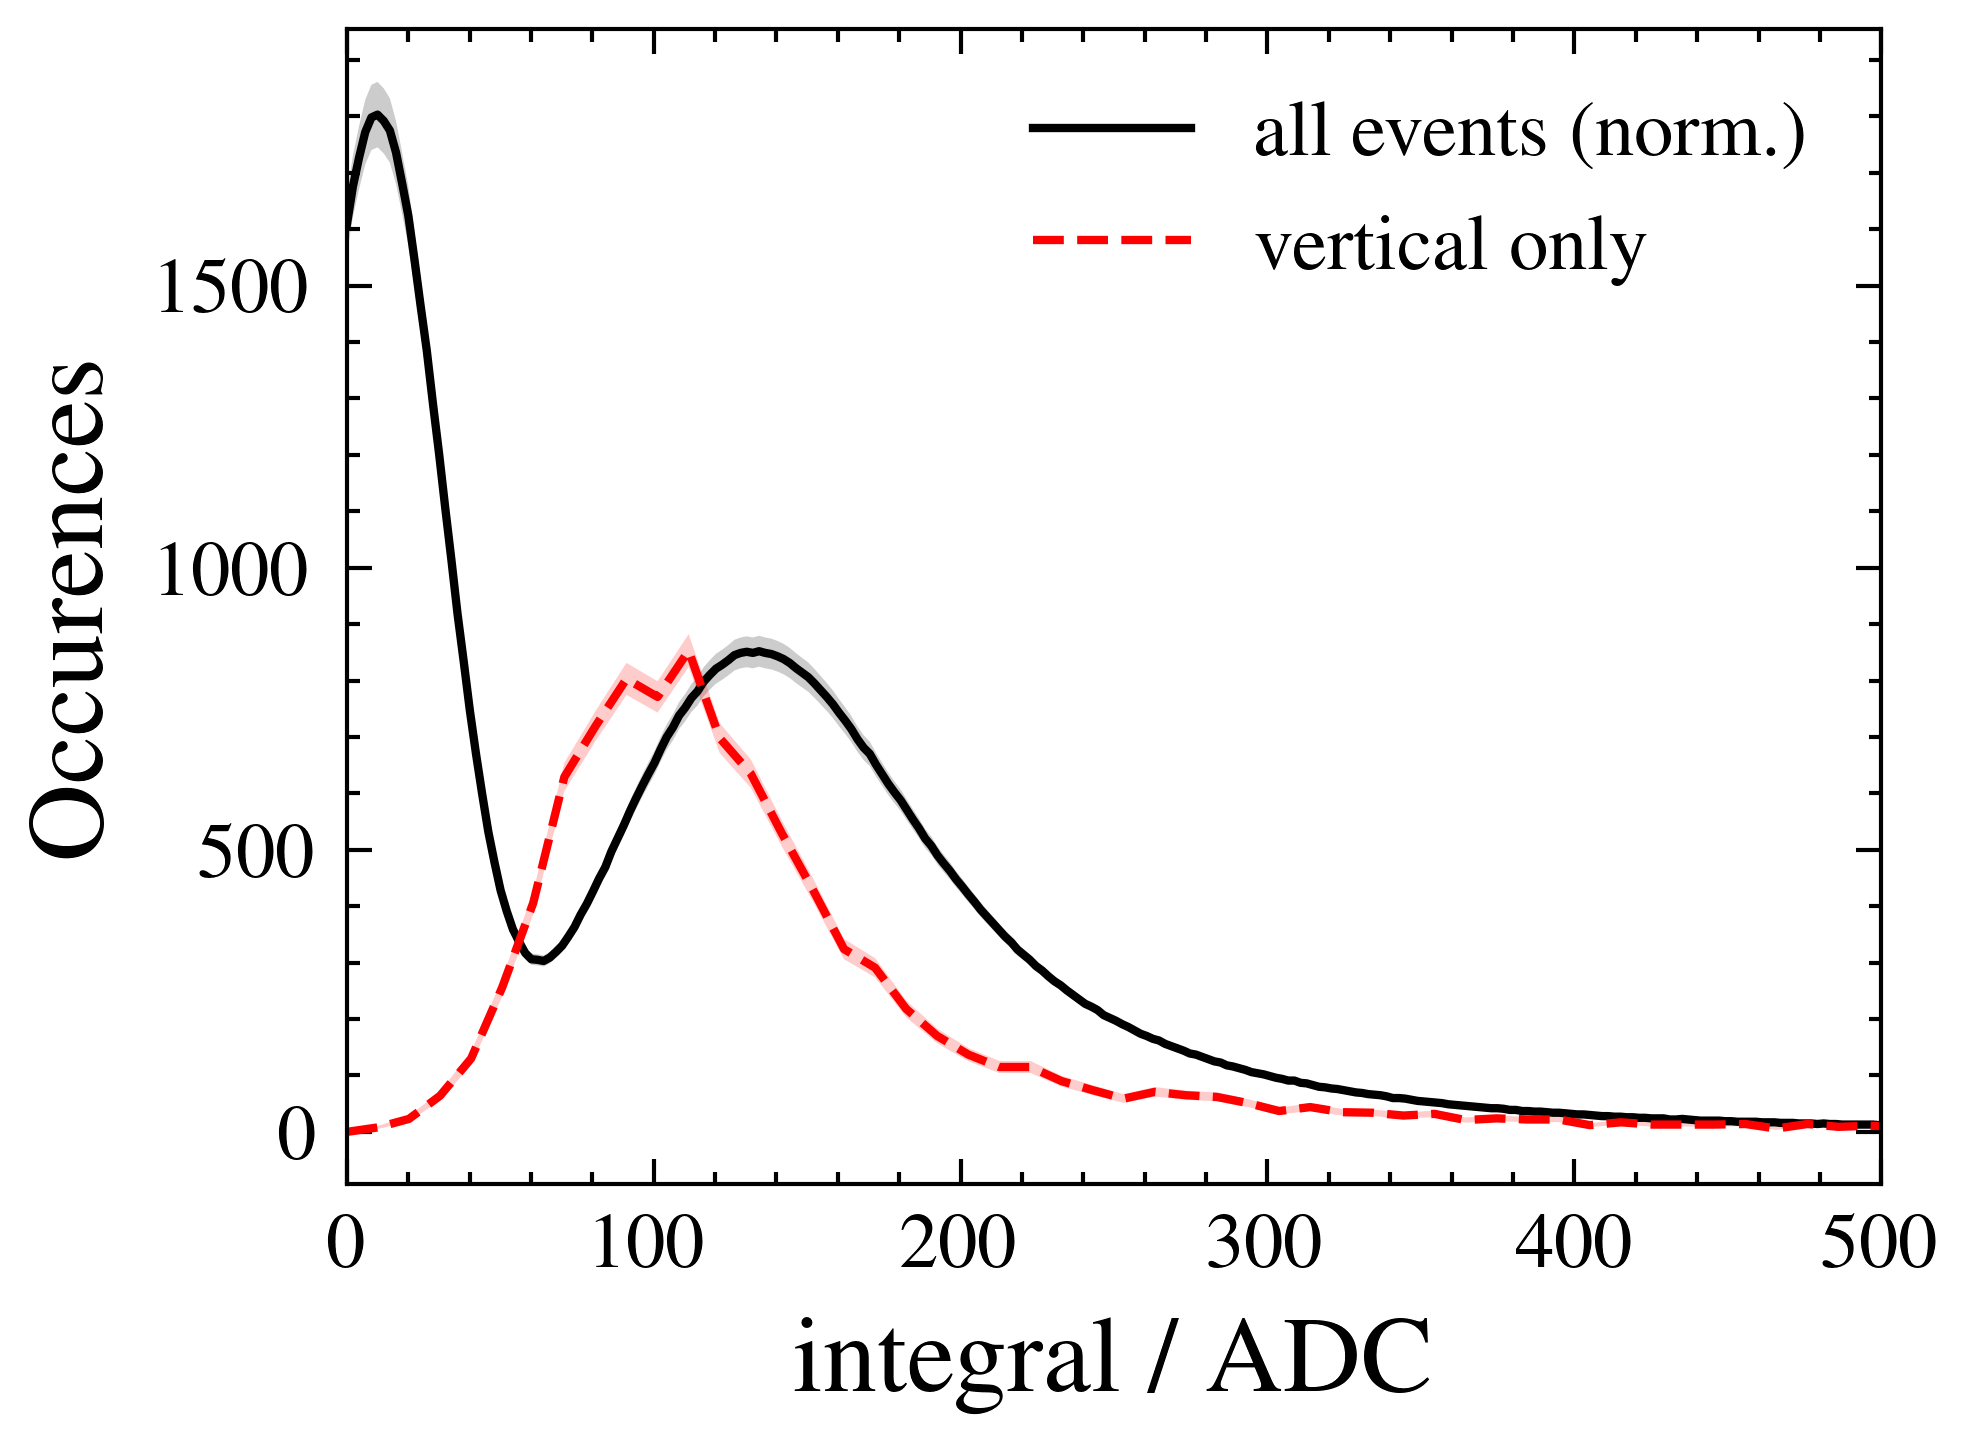

In [2]:
from utils.binaries import *
from utils.plotting import *

vertical, vertical_err = np.zeros((2, 80))
omnidirectional, omnidirectional_err = np.zeros((2, 400))


def read(line: str) -> tuple[int, float]:
    idx, val = line.split(",")
    idx = idx.split("(")[-1]
    val = val.split(")")[0]

    return int(idx) - 2, float(val)


with open("unnamed.c.C", "r") as f:
    lines = f.readlines()

for line in lines:
    if line.startswith("   hChargeSSD__1->SetBinContent"):
        idx, val = read(line.rstrip())
        vertical[idx] = val
    elif line.startswith("   hChargeSSD__1->SetBinError"):
        idx, val = read(line.rstrip())
        vertical_err[idx] = val
    elif line.startswith("   hCalibChargeSSD__2->SetBinContent"):
        idx, val = read(line.rstrip())
        omnidirectional[idx] = val
    elif line.startswith("   hCalibChargeSSD__2->SetBinError"):
        idx, val = read(line.rstrip())
        omnidirectional_err[idx] = val

set_plt_style("tex double")

bins_vertical = np.linspace(0, 800, 80)
bins_omnidirectional = np.linspace(0, 800, 400)

f = 1
plt.plot(bins_omnidirectional, f * omnidirectional, label="all events (norm.)")
plt.fill_between(
    bins_omnidirectional,
    f * (omnidirectional - omnidirectional_err),
    f * (omnidirectional + omnidirectional_err),
    alpha=0.2,
)

plt.plot(bins_vertical, vertical, label="vertical only", marker='none')
plt.fill_between(
    bins_vertical, vertical - vertical_err, vertical + vertical_err, alpha=0.2
)

plt.xlabel("integral / ADC")
plt.ylabel("Occurences")
plt.xlim(0, 500)
plt.legend()

# plt.text(0, 1.03, "Preliminary", transform=plt.gca().transAxes, c="red", fontsize=14)
# plt.savefig('charge.png')
